<a href="https://colab.research.google.com/github/jatin1bagga/ML-LAB-EVALUATION/blob/main/LAB_EVALUATION_102203713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

**UPLOADING THE DATASET**

In [4]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')
data.head()


Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


**PREPARE FEATURES AND TARGET**

In [5]:
# Select Target4 and drop other targets
target_column = 'Target4'
features = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
target = data[target_column]

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Confirm dimensions
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (700, 15)
Testing Features Shape: (300, 15)
Training Target Shape: (700,)
Testing Target Shape: (300,)


**TRAIN AND EVALUATE MODELS**

In [6]:
# Initialize models
models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, eval_metric='rmse'),
    "CatBoost Regressor": CatBoostRegressor(verbose=0, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Ridge Regressor": Ridge(random_state=42),
    "Lasso Regressor": Lasso(random_state=42),
    "Histogram Gradient Boosting Regressor": HistGradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results[name] = {"MSE": mse, "R2": r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")


Gradient Boosting Regressor: MSE = 5.441, R² = -0.129
K-Nearest Neighbors Regressor: MSE = 5.865, R² = -0.218
AdaBoost Regressor: MSE = 4.852, R² = -0.007
XGBoost Regressor: MSE = 6.529, R² = -0.355
CatBoost Regressor: MSE = 5.448, R² = -0.131
Extra Trees Regressor: MSE = 5.169, R² = -0.073
Random Forest Regressor: MSE = 5.077, R² = -0.054
Ridge Regressor: MSE = 4.896, R² = -0.016
Lasso Regressor: MSE = 4.936, R² = -0.025
Histogram Gradient Boosting Regressor: MSE = 5.729, R² = -0.189


In [7]:
# Summarize Results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  - Mean Squared Error (MSE): {metrics['MSE']:.3f}")
    print(f"  - R² Score: {metrics['R2']:.3f}")
    print()


Model: Gradient Boosting Regressor
  - Mean Squared Error (MSE): 5.441
  - R² Score: -0.129

Model: K-Nearest Neighbors Regressor
  - Mean Squared Error (MSE): 5.865
  - R² Score: -0.218

Model: AdaBoost Regressor
  - Mean Squared Error (MSE): 4.852
  - R² Score: -0.007

Model: XGBoost Regressor
  - Mean Squared Error (MSE): 6.529
  - R² Score: -0.355

Model: CatBoost Regressor
  - Mean Squared Error (MSE): 5.448
  - R² Score: -0.131

Model: Extra Trees Regressor
  - Mean Squared Error (MSE): 5.169
  - R² Score: -0.073

Model: Random Forest Regressor
  - Mean Squared Error (MSE): 5.077
  - R² Score: -0.054

Model: Ridge Regressor
  - Mean Squared Error (MSE): 4.896
  - R² Score: -0.016

Model: Lasso Regressor
  - Mean Squared Error (MSE): 4.936
  - R² Score: -0.025

Model: Histogram Gradient Boosting Regressor
  - Mean Squared Error (MSE): 5.729
  - R² Score: -0.189



**VISUALIZING WITH GRAPHS**

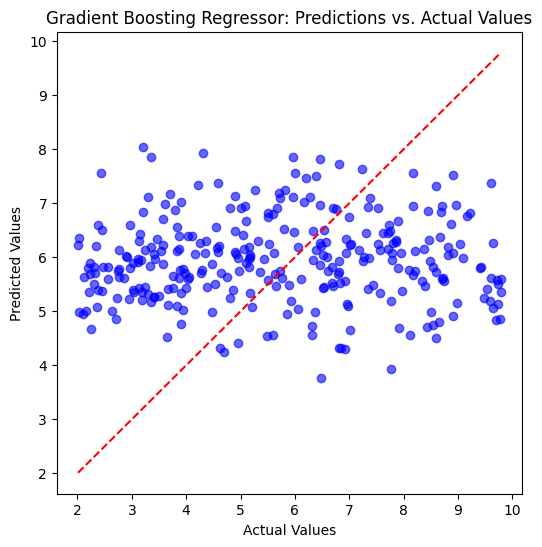

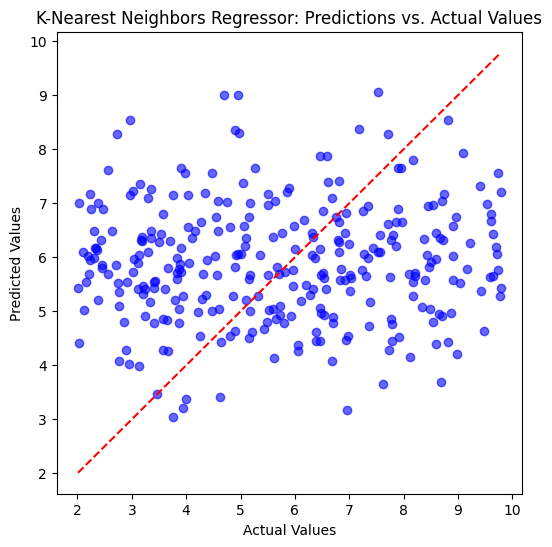

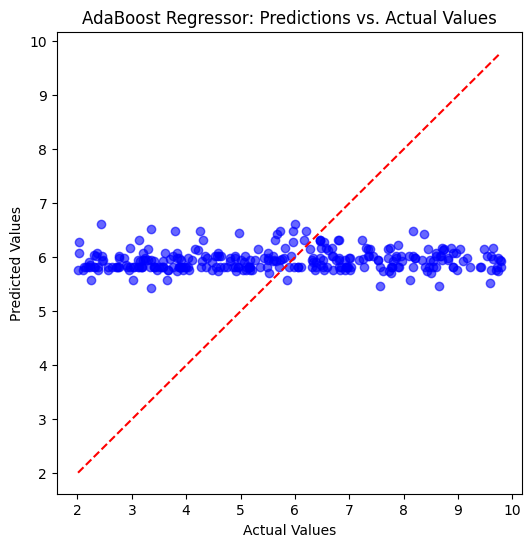

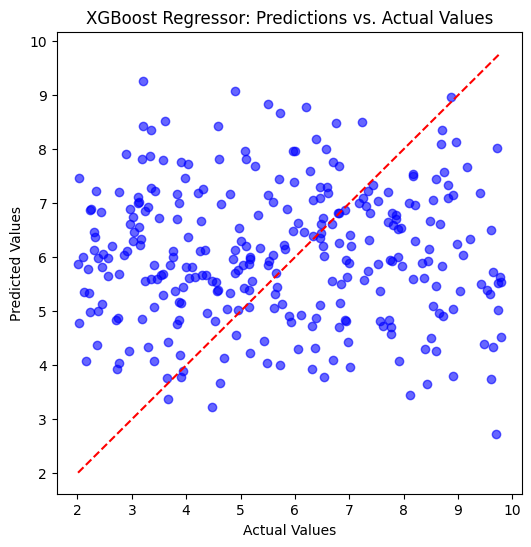

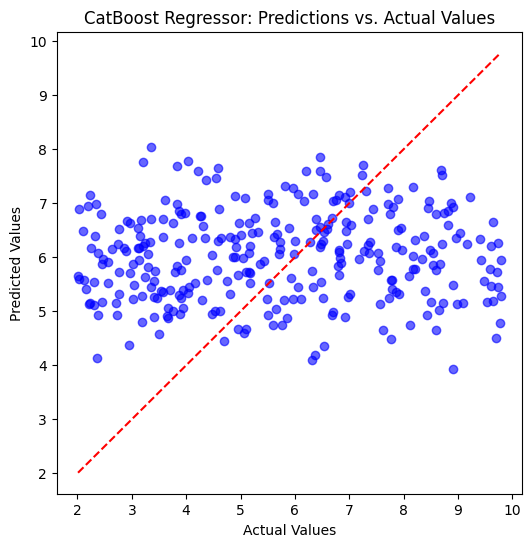

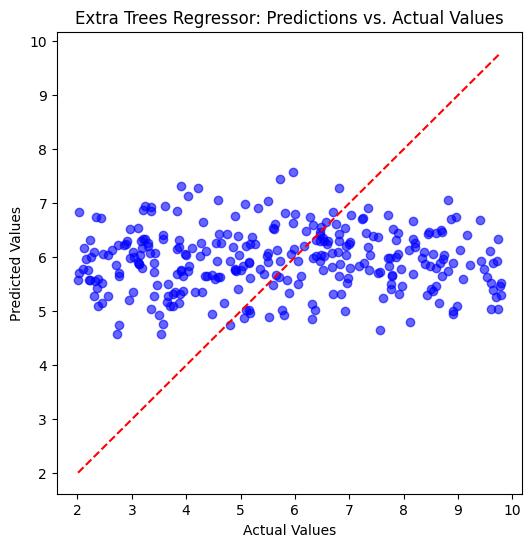

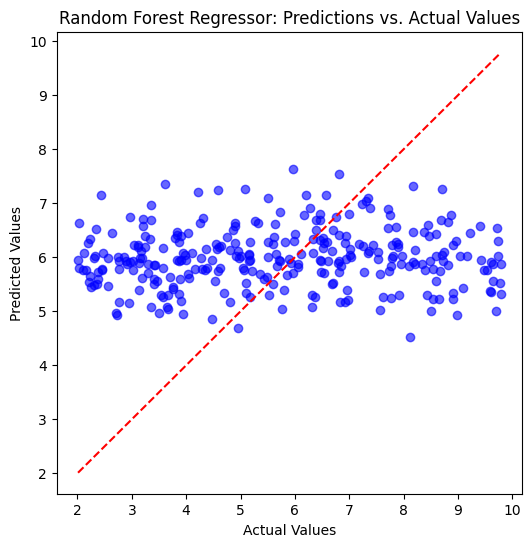

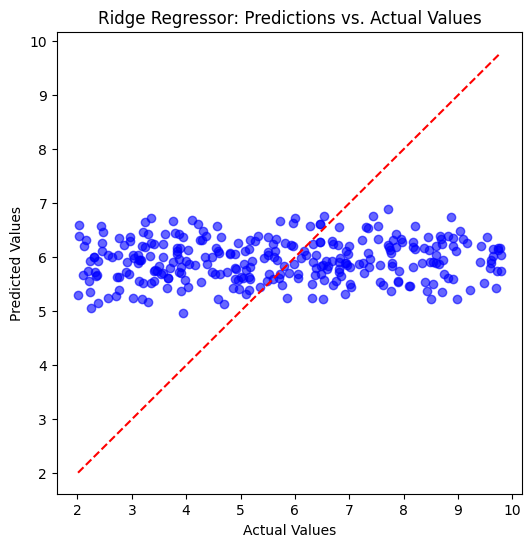

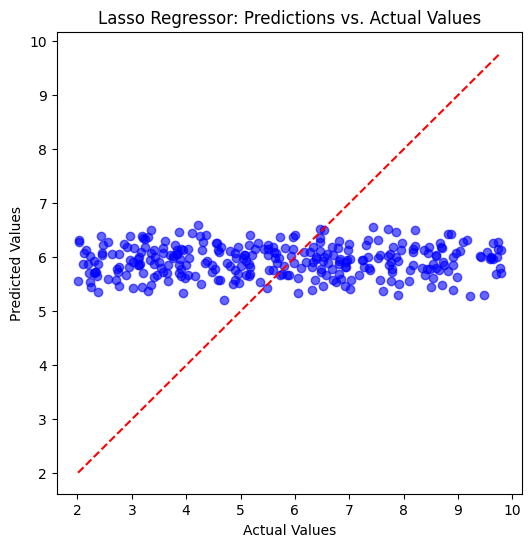

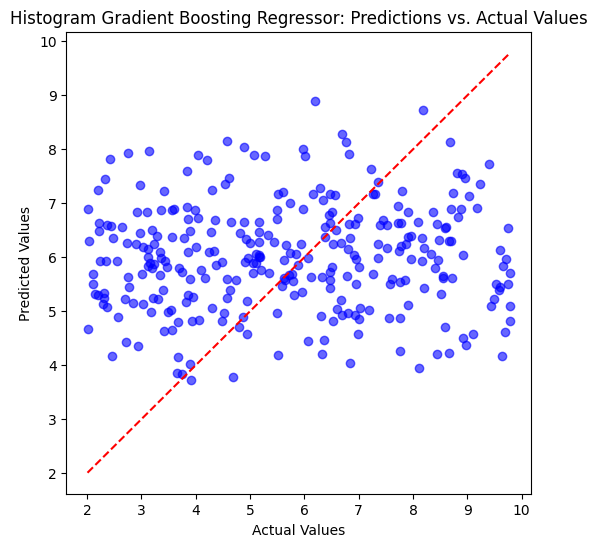

In [8]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values for each model
for model_name, model in models.items():
    predictions = model.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, predictions, alpha=0.6, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"{model_name}: Predictions vs. Actual Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
